# Programa de Pós-Graduação em Engenharia de Teleinformática
# Otimização Não-linear de Sistemas
# Prof. Tarcisio Ferreira Maciel, Dr.-Ing. (Professor: [maciel@ufc.br](mailto:maciel@ufc.br))
---
## Identificação do aluno

Nome: André Luis Dantas Gadelha

Matrícula: 522364

---

A correlação espacial $ \rho_{i,j} $ entre os canais $ \mathbf{h}_i = \begin{bmatrix} h_{i,1} & h_{i,2} & \ldots & h_{i,N} \end{bmatrix}$ e $ \mathbf{h}_j = \begin{bmatrix} h_{j,1} & h_{j,2} & \ldots & h_{j,N} \end{bmatrix}$, com $\mathbf{h}_i, \mathbf{h}_j \in \mathbb{C}^N $ do enlace direto de uma estação rádio base com $ N $ antenas para os terminais móveis $ i, j $ é dada por $ \rho_{i,j} = \dfrac{ \vert \mathbf{h}_i \mathbf{h}^H_j \vert}{ \Vert \mathbf{h}_i \Vert_2 \Vert \mathbf{h}_j \Vert_2 } $. Sabendo que existem $ K $ terminais móveis, selecione $ G \leq N $ terminais móveis tal que a soma das correlações entre eles dois-a-dois seja mínima, ou seja, selecione os $ G $ terminais móveis com os canais menos correlacionados. Esse problema pode ser formulado como segue: %
$$
\begin{align}
    \mathbf{x}^\star = \underset{ \mathbf{x} }{ \text{minimize} } \quad & \frac{1}{2}\mathbf{x}^T \mathbf{R} \mathbf{x}, \\
    \text{sujeito a} \quad & \boldsymbol{1}^T\mathbf{x} = G, \\
    & \mathbf{x} \in \mathbb{B}^K,
\end{align}
$$
onde $ \mathbf{R} = {[\rho_{i,j}]}_{i,j}, \quad i, j \in  \{1, 2, \ldots, K\} $. Este problema é um **problema de otimização binário quadrático**: função custo quadrática com variáveis de otimização binárias.

O problema acima pode ser simplificado se as variáveis em $\mathbf{x}$ forem relaxadas gerando $ \tilde{\mathbf{x}} \in \mathbb{R}^N $ e $\boldsymbol{0} \leq \tilde{\mathbf{x}} \leq \boldsymbol{1} $. Mesmo assim, o problema acima pode ainda será NP-difícil se a matriz $ \mathbf{R} \not \succcurlyeq \boldsymbol{0} $, i.e., se a matriz $ \mathbf{R} $ não for positiva semidefinida.

De acordo com a construção acima, sabe-se que $ \mathbf{R} $ não é necessariamente positiva semidefinida. Isso pode ser demonstrado gerando-se várias instâncias dessa matriz a partir de canais para $K$ usuários e mostrando a distribuição de seus autovalores. Será possível observar que para algumas instâncias, haverá a ocorrência de autovalores negativos.

In [1]:
# Importa a biblioteca numpy
import numpy as np
# Configura o número de casas decimais impressas para arrarys numpy
np.set_printoptions(precision=3)

# Número de usuários
K = 16
# Número de antenas na ERB
N = 8
# Numero de usuários no grupo
G = 5
# Gera os canais Rayleigh 1 x N descorrelacionados para os K usuários criando-se a matriz H com todos os canais destes usuários empilhados, um por linha
H = np.random.randn(K, N)*np.sqrt(0.5) + 1j*np.random.randn(K, N)*np.sqrt(0.5)

# Gera um simples exemplo de que a matriz R não é positiva semidefinida
R = np.abs(H @ np.transpose(np.conjugate(H)))
D = np.linalg.inv(np.diag(np.sqrt(np.diag(R))))
R = D @ R @ D
print('Mínimo autovalor de R:', np.min(np.linalg.eigvals(R)))

Mínimo autovalor de R: -0.2361716022125053


Com base no código acima, **gere e plote a distribuição do menor autovalor $\lambda_{min}$ da matriz $\mathbf{R}$ para o cenário configurado acima.**

Uma forma de convexificar o problema apresentado é regularizar a matriz $\mathbf{R}$ gerando uma matriz $\tilde{\mathbf{R}}$ positiva semidefinida. Naturalmente, o problema assim gerado é apenas uma aproximação para o problema original, ou seja, teríamos
$$
\begin{align}
    \tilde{\mathbf{x}}^\star = \underset{ \tilde{\mathbf{x}} }{ \text{minimize} } \quad & \frac{1}{2}\tilde{\mathbf{x}}^T \tilde{\mathbf{R}} \tilde{\mathbf{x}}, \\
    \text{sujeito a} \quad & \boldsymbol{1}^T\tilde{\mathbf{x}} = G, \\
    & \boldsymbol{0} \leq \tilde{\mathbf{x}} \leq \boldsymbol{1}.
\end{align}
$$

Considerando o problema relaxado e convexificado acima, podemos obter uma solução aproximada para o problema original arrendondando para 1 as $G$ maiores componentes de $\tilde{\mathbf{x}}$.

Com base nisso, **convexifique o problema original utilizando uma regularização adequada para $\mathbf{R}$ e solucione o problema original através do problema aproximado.**

**Compare a capacidade de canal do grupo de $G$ usuários assim selecionado contra a capacidade de canal do grupo de $G$ de usuários ótimo**. Em ambos os casos, considere a aplicação de **formatação de feixes com forçagem a zero (ZF).** O grupo ótimo pode ser determinado por busca exaustiva entre todas as combinações de $K$ usuários $G$-a-$G$.

**Varia o tamanho $G$ do grupo de 1 a N e avalie a capacidade ótima (busca exaustiva) e a capacidade subótima (convexificação do problema).**

**Para todas as análises, utilize simulações de Monte-Carlo com no mínimo 1000 realizações.**

# Referências

[1] A convex quadratic SDMA grouping algorithm based on spatial correlation. In: IEEE International Conference on Communications, 2007, Glasgow. Proc. of the IEEE International Conference on Communications, 2007. v. 1. p. 5342-5346. [https://doi.org/10.1109/ICC.2007.884](https://doi.org/10.1109/ICC.2007.884)

### Resolução:
Primeiramente devemos gerar a distribuição dos menores autovalores do problema, podemos fazer isso gerando um experimento aleátoria com uma amostra de 1000 matrizes R:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from itertools import combinations as comb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis

# Configura o número de casas decimais impressas para arrarys numpy
np.set_printoptions(precision=3)

# Número de usuários
K = 16
# Número de antenas na ERB
N = 8
# Numero de usuários no grupo
G = 5
# Gera os canais Rayleigh 1 x N descorrelacionados para os K usuários criando-se a matriz H com todos os canais destes
#usuários empilhados, um por linha

In [3]:
min_eig_val = np.zeros(1000)
for i in range(1000):
    H = np.random.randn(K, N)*np.sqrt(0.5) + 1j*np.random.randn(K, N)*np.sqrt(0.5)
    # Gera um simples exemplo de que a matriz R não é positiva semidefinida
    R = np.abs(H @ np.transpose(np.conjugate(H)))
    D = np.linalg.inv(np.diag(np.sqrt(np.diag(R))))
    R = D @ R @ D
    min_eig_val[i]=(np.min(np.linalg.eigvals(R)))

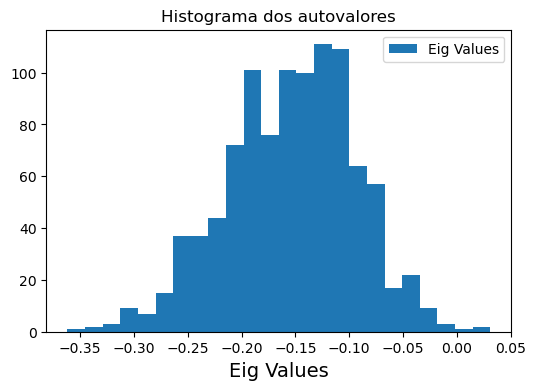

In [4]:
fig1, ax = plt.subplots(figsize=(6, 4), dpi=100)
plt.hist(min_eig_val, bins='auto',label='Eig Values')
ax.legend()
ax.set_title('Histograma dos autovalores')
ax.set_xlabel('Eig Values',fontsize=14);


#### Parte 2:
convexificando o problema original utilizando uma regularização adequada para $\mathbf{R}$.</p>
Sabemos que para transformar uma matriz qualquer em semipositiva definida devemos somar a diagonal principal o valor do menor autovalor negativo, se presente. Na expressão das restrições foi feita a relaxação em x.

In [5]:
# Gera um simples exemplo de que a matriz R não é positiva semidefinida

R = np.abs(H @ np.transpose(np.conjugate(H)))
N = np.linalg.inv(np.diag(np.sqrt(np.diag(R))))
R = N @ R @ N
min_eig_val=(np.min(np.linalg.eigvals(R)))

#Tratando a matriz para torna-la Semi Positiva definida
R_ = R+abs(min_eig_val)*np.identity(R.shape[0])

#### Parte 3:
Considerando este cenário, o problema de agrupamento SDMA corresponde à construção de um grupo G contendo um número total de canais vetoriais G ≤ N selecionados de forma otimizada entre todos os K os existentes no setor, ou seja, para selecionar de forma otimizada G linhas de H. De posse do vetor solução, que são os indices de G maiores probabilidades de X, é possivel produzir a Matriz **G** do problema, ou seja, $G=H[x^*,:]$. Usando a referencia do enunciado, sabemos que a capacidade de um grupo SDMA é: $$ Capacity = \log_2 (\det ( \mathit{I} + \sigma^{-2}_n \boldsymbol{DGM(DGM)^H}))) $$
onde $\boldsymbol{D}$ é a matriz identidade e M é dado por: $$M = \frac{\sqrt{P}\boldsymbol{G^H(GG^H)}^{-1}}{|| \boldsymbol{G^H(GG^H)}^{-1}||_F}$$
assumindo: P=1 e $\sigma = 1$


In [7]:
#Hessiana
def hessiana(Mat):
    return np.transpose(np.conjugate(Mat))

In [8]:
def capacity(H,sol):
    #Calculando a matrix G
    G_mat = H[sol,:]

    #Calculando a hessiana de G
    G_hes = hessiana(G_mat)

    #calculando M
    G_inv = np.linalg.inv(G_mat@G_hes)
    norma_pseud_G = np.linalg.norm(G_hes@G_inv)
    M = (G_hes@G_inv)/norma_pseud_G

    #capacidade de G:
    Capacity = np.abs(np.log2(np.linalg.det(np.identity(G)+ (G_mat@M) @ hessiana(G_mat@M))))
    return Capacity

In [9]:
def conv_sol(G,R_):
    x = cp.Variable((K, 1))
    constrains = [x>=0,x<=1,sum(x)==G]
    prob = cp.Problem(cp.Minimize(cp.quad_form(x,R_)),constrains)
    result = prob.solve()
    # Conjunto dos indices de maior Probabilidade para a solução aproximada pela sugestão do enunciado
    sol_aprox = list(x.value.reshape(K).argpartition(-G)[-G:])

    cap_aprox = capacity(H,sol_aprox)
    return cap_aprox

In [10]:
def opt_sol(G,R):
    #
    # Calculando valor otimo por busca exaustiva
    #

    #Conjunto de todas as combinações possives em x de G-G:
    conj_G = [i for i in comb(range(K),G)]
    sol_otima = 100000000
    x_ = np.zeros([K,1])
    x_otimo = np.zeros([K,1])

    #Iterando sobre todas as combinações possiveis de x
    for j in conj_G:
        j=list(j)
        x_ = np.zeros([K,1])
        x_[j]=1
        #Variavel sol recebe o valor da função objetivo usando o R sem relaxação
        sol = x_.reshape([K,1]).T@R@x_.reshape([K,1])

        #avaliando a solução
        if sol < sol_otima:
            sol_otima = x_.reshape([K,1]).T@R@x_.reshape([K,1])
            x_otimo = x_

    sol_otimo = x_otimo.ravel().reshape(K).argpartition(-G)[-G:]

    cap_otima = capacity(H,sol_otimo)
    
    return cap_otima

In [12]:
#
# Comparando os resultados da convexificação para uma simulação com 1000 matrizes
#
N=8
result = []
for i_ in range(1000):
    H = np.random.randn(K, N)*np.sqrt(0.5) + 1j*np.random.randn(K, N)*np.sqrt(0.5)
    # Gera um simples exemplo de que a matriz R não é positiva semidefinida
    R = np.abs(H @ np.transpose(np.conjugate(H)))
    N_ = np.linalg.inv(np.diag(np.sqrt(np.diag(R))))
    R = N_ @ R @ N_
    min_eig_val=(np.min(np.linalg.eigvals(R)))

    #Tratando a matriz para torna-la Semi Positiva definida
    R_ = R+abs(min_eig_val)*np.identity(R.shape[0])
    
    #Traçando perfil do resultado associado
    G=5
    
    result.append([opt_sol(G,R),conv_sol(G,R_)])
result = np.array(result)    

In [13]:
#
# Fazendo uma analise da distribuição do erro medio absoluto
#

erromse = sum(abs(result[:,1]-result[:,0]))/result.shape[0]
print(f"Erro médio absoluto (MSE): %.4f"%erromse)
erro_mse = result[:,1]-result[:,0]
std_erro = np.std(abs(erro_mse))
print(f"Desvio Padrão do erro: %.4f"%std_erro)
plt.hist(erro_mse,bins=20);
skew_erro = skew(erro_mse)
print(f"Skewness do erro: %.4f"%skew_erro)
kurt_erro = kurtosis(erro_mse)
print(f"kurtosis do erro: %.4f"%kurt_erro)


NameError: name 'erro_mse' is not defined

### Considerações:
Considerando as estatisticas obtidas, é possível ver que a distribuição não é simetrica, com mais valores à esquerda, indicando que há uma alta probabilidade do modelo convexificado ter valores maiores de capacidade do que o modelo otimo, porém como o erro é baixo, leva-se em consideração que mesmo errando pouco é possível confiar numa baixa diferença entre modelos convexificados e otimos, principalmente para  problemas envolvendo mais clientes.

### Parte 4: Variando G de 1 ate N:
para essa parte do trabalho devemos estabelecer uma tabela para fazermos as análises:

In [14]:
comp_result = []
for g in range(1,N+1):
    result = []
    for i_ in range(1000):
        H = np.random.randn(K, N)*np.sqrt(0.5) + 1j*np.random.randn(K, N)*np.sqrt(0.5)
        # Gera um simples exemplo de que a matriz R não é positiva semidefinida
        R = np.abs(H @ np.transpose(np.conjugate(H)))
        N_ = np.linalg.inv(np.diag(np.sqrt(np.diag(R))))
        R = N_ @ R @ N_
        min_eig_val=(np.min(np.linalg.eigvals(R)))

        #Tratando a matriz para torna-la Semi Positiva definida
        R_ = R+abs(min_eig_val)*np.identity(R.shape[0])

        #Traçando perfil do resultado associado
        G=g

        result.append([opt_sol(G,R),conv_sol(G,R_),g])
    result = np.array(result)
    media_opt = np.mean(result[:,0])
    media_conv = np.mean(result[:,1])
    erromse = sum(abs(result[:,1]-result[:,0]))/result.shape[0]
    erro_mse = result[:,1]-result[:,0]
    std_erro = np.std(abs(erro_mse))
    skew_erro = skew(erro_mse)
    kurt_erro = kurtosis(erro_mse)
    comp_result.append([erromse,std_erro,skew_erro,kurt_erro,media_opt,media_conv])


In [15]:
data = pd.DataFrame(comp_result,columns = ['MSE','STD','Skewness','Kurtosis','media_opt','media_conv'])
G_ = range(1,N+1)
data.index = G_
data

,MSE,STD,Skewness,Kurtosis,media_opt,media_conv
1,0.479718,0.407897,0.014690,0.251225,3.040136,3.086761
2,0.550565,0.491158,-0.113042,0.796629,4.453195,4.375198
3,0.486210,0.476565,-0.215752,0.992518,5.260684,5.124885
4,0.418002,0.473905,-0.514932,2.094707,5.609696,5.410944
5,0.415944,0.503712,-0.738078,2.137496,5.585967,5.348135
6,0.441430,0.605974,-0.930849,4.116365,4.935282,4.721165
7,0.585306,0.801163,-0.535160,3.157485,3.617005,3.427244
8,0.566460,0.758425,0.080640,2.423338,1.739304,1.691843


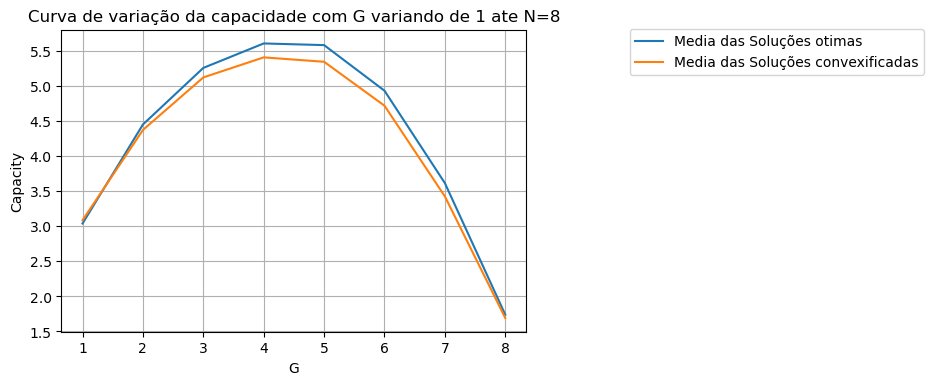

In [25]:
fig0, ax = plt.subplots(figsize=(6, 4), dpi=100)
data['media_opt'].plot(label='Media das Soluções otimas')
data['media_conv'].plot(label='Media das Soluções convexificadas')
ax.grid()
ax.legend(bbox_to_anchor=(1.87, 1.025))
ax.set_title('Curva de variação da capacidade com G variando de 1 ate N=8')
ax.set_xlabel('G')
ax.set_ylabel('Capacity');

### Considerações:
Para todos os valores de de G o erro permaneceu baixo, indicando uma boa acuracia da convexificação, para valores maiores de G podemos observar um crescimento do valor da Kurtosis, indicando uma maior assimetria da distribuição, o que gera instabilidade na confiança do modelo.

In [ ]:
fig0, ax = plt.subplots(figsize=(6, 4), dpi=100)